(60000, 784)
(10000, 784)
Epoch 1/50
235/235 [==============================] - 4s 9ms/step - loss: 0.2761 - val_loss: 0.1900
Epoch 2/50
235/235 [==============================] - 2s 9ms/step - loss: 0.1708 - val_loss: 0.1536
Epoch 3/50
235/235 [==============================] - 2s 9ms/step - loss: 0.1449 - val_loss: 0.1345
Epoch 4/50
235/235 [==============================] - 2s 8ms/step - loss: 0.1294 - val_loss: 0.1218
Epoch 5/50
235/235 [==============================] - 2s 8ms/step - loss: 0.1188 - val_loss: 0.1132
Epoch 6/50
235/235 [==============================] - 2s 8ms/step - loss: 0.1117 - val_loss: 0.1076
Epoch 7/50
235/235 [==============================] - 2s 8ms/step - loss: 0.1067 - val_loss: 0.1033
Epoch 8/50
235/235 [==============================] - 2s 9ms/step - loss: 0.1029 - val_loss: 0.0998
Epoch 9/50
235/235 [==============================] - 2s 9ms/step - loss: 0.0999 - val_loss: 0.0973
Epoch 10/50
235/235 [==============================] - 2s 10ms/step - loss

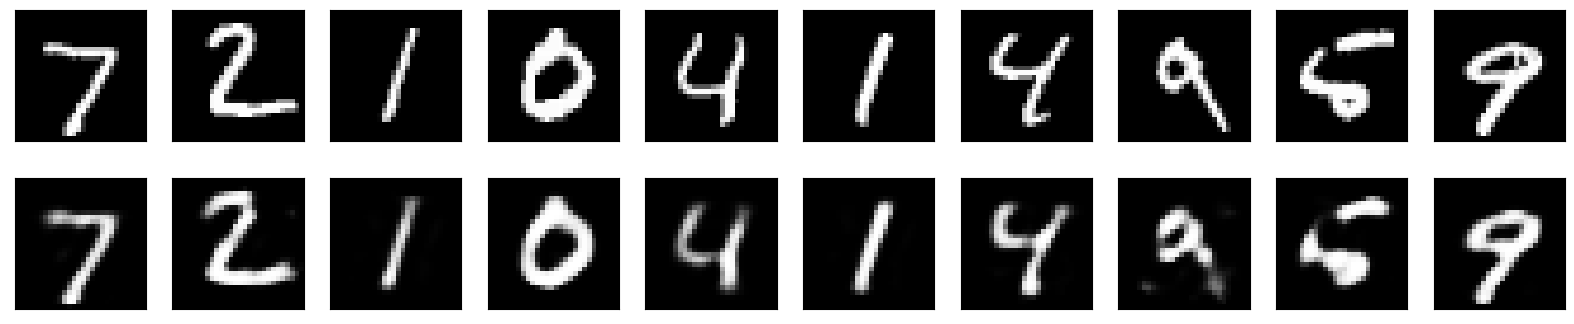

(60000, 784)
(10000, 784)
Epoch 1/50
235/235 [==============================] - 7s 14ms/step - loss: 0.2851 - val_loss: 0.1978
Epoch 2/50
235/235 [==============================] - 3s 14ms/step - loss: 0.1778 - val_loss: 0.1611
Epoch 3/50
235/235 [==============================] - 2s 10ms/step - loss: 0.1527 - val_loss: 0.1429
Epoch 4/50
235/235 [==============================] - 4s 16ms/step - loss: 0.1378 - val_loss: 0.1308
Epoch 5/50
235/235 [==============================] - 3s 12ms/step - loss: 0.1279 - val_loss: 0.1227
Epoch 6/50
235/235 [==============================] - 3s 11ms/step - loss: 0.1212 - val_loss: 0.1173
Epoch 7/50
235/235 [==============================] - 3s 14ms/step - loss: 0.1165 - val_loss: 0.1135
Epoch 8/50
235/235 [==============================] - 3s 13ms/step - loss: 0.1132 - val_loss: 0.1106
Epoch 9/50
235/235 [==============================] - 4s 15ms/step - loss: 0.1108 - val_loss: 0.1085
Epoch 10/50
235/235 [==============================] - 2s 11ms/st

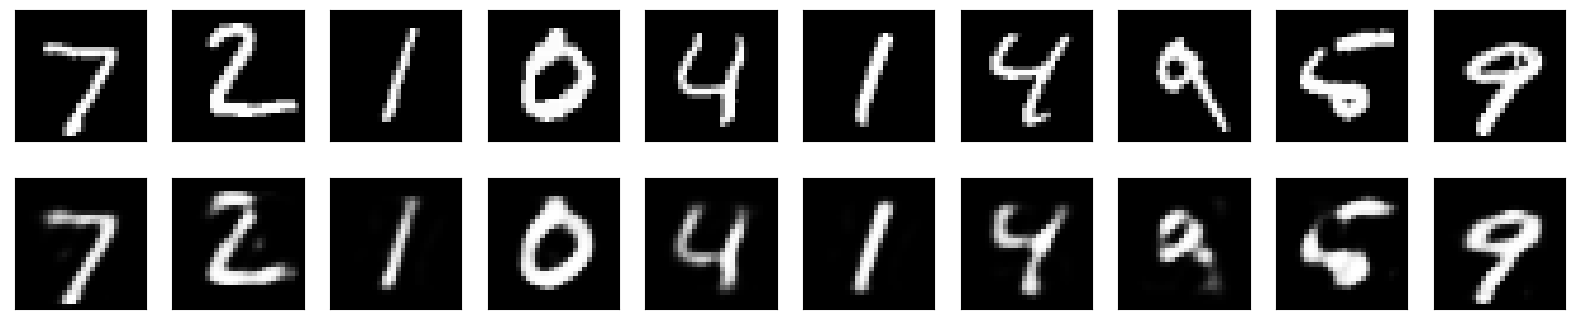

Epoch 1/100
235/235 [==============================] - 12s 25ms/step - loss: 0.2437 - val_loss: 0.1662
Epoch 2/100
235/235 [==============================] - 4s 18ms/step - loss: 0.1515 - val_loss: 0.1369
Epoch 3/100
235/235 [==============================] - 5s 20ms/step - loss: 0.1322 - val_loss: 0.1263
Epoch 4/100
235/235 [==============================] - 5s 20ms/step - loss: 0.1237 - val_loss: 0.1190
Epoch 5/100
235/235 [==============================] - 5s 20ms/step - loss: 0.1177 - val_loss: 0.1139
Epoch 6/100
235/235 [==============================] - 5s 20ms/step - loss: 0.1133 - val_loss: 0.1100
Epoch 7/100
235/235 [==============================] - 5s 20ms/step - loss: 0.1103 - val_loss: 0.1075
Epoch 8/100
235/235 [==============================] - 4s 18ms/step - loss: 0.1078 - val_loss: 0.1055
Epoch 9/100
235/235 [==============================] - 6s 24ms/step - loss: 0.1058 - val_loss: 0.1033
Epoch 10/100
235/235 [==============================] - 4s 18ms/step - loss: 0.10

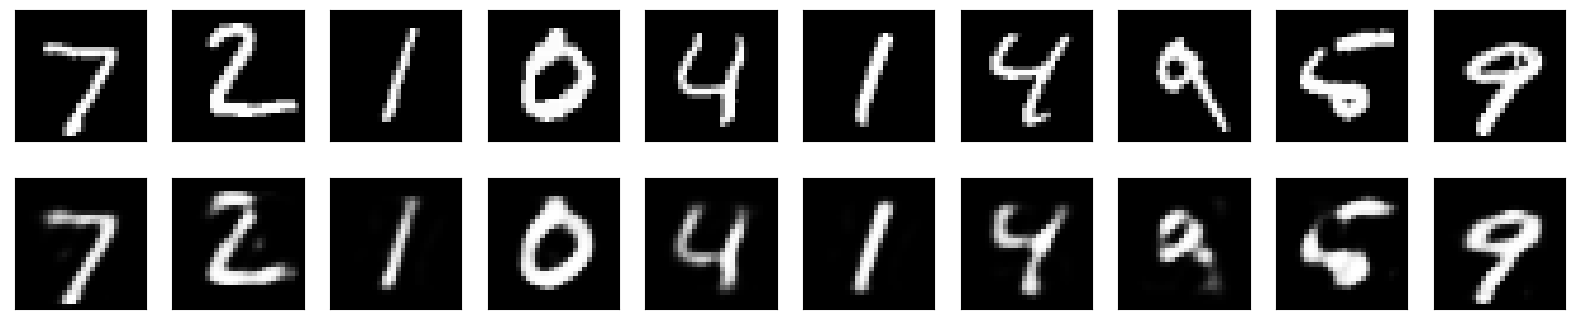

In [1]:
import keras
from keras import layers
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
from keras import regularizers
from keras.datasets import mnist
encoding_dim = 32 
input_img = keras.Input(shape=(784,))

# "encoded" is the encoded representation of the input
encoded = layers.Dense(encoding_dim, activation='relu')(input_img)

# "decoded" is the lossy reconstruction of the input
decoded = layers.Dense(784, activation='sigmoid')(encoded)

# This model maps an input to its reconstruction
autoencoder = keras.Model(input_img, decoded)

# This model maps an input to its encoded representation
encoder = keras.Model(input_img, encoded)

# This is our encoded (32-dimensional) input
encoded_input = keras.Input(shape=(encoding_dim,))
# Retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# Create the decoder model
decoder = keras.Model(encoded_input, decoder_layer(encoded_input))

#Now let's train our autoencoder to reconstruct MNIST digits.

#First, we'll configure our model to use a per-pixel binary crossentropy loss, and the Adam optimizer:

autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

#Let's prepare our input data. We're using MNIST digits, and we're discarding the labels (since we're only interested in encoding/decoding the input images).


(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

# Now let's train our autoencoder for 50 epochs:
autoencoder.fit(x_train, x_train,epochs=50,batch_size=256,
                shuffle=True,validation_data=(x_test, x_test))

# Encode and decode some digits from the test set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

# Use Matplotlib 
n = 10  # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

"""Adding a sparsity constraint on the encoded representations"""
encoding_dim = 32
input_img = keras.Input(shape=(784,))
# Add a Dense layer with a L1 activity regularizer
encoded = layers.Dense(encoding_dim, activation='relu',
                activity_regularizer=regularizers.l1(10e-5))(input_img)
decoded = layers.Dense(784, activation='sigmoid')(encoded)

autoencoder = keras.Model(input_img, decoded)
encoder = keras.Model(input_img, encoded)
encoded_input = keras.Input(shape=(encoding_dim,))
decoder_layer = autoencoder.layers[-1]
decoder = keras.Model(encoded_input, decoder_layer(encoded_input))

autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

(x_train, _), (x_test, _) = mnist.load_data()

# We will normalize all values between 0 and 1 and we will flatten the 28x28 images into vectors of size 784.

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)


# Now let's train our autoencoder for 50 epochs:

autoencoder.fit(x_train, x_train,epochs=50,batch_size=256,
                shuffle=True,validation_data=(x_test, x_test))

encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

n = 10  # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

"""Deep autoencoder"""
input_img = keras.Input(shape=(784,))
encoded = layers.Dense(128, activation='relu')(input_img)
encoded = layers.Dense(64, activation='relu')(encoded)
encoded = layers.Dense(32, activation='relu')(encoded)

decoded = layers.Dense(64, activation='relu')(encoded)
decoded = layers.Dense(128, activation='relu')(decoded)
decoded = layers.Dense(784, activation='sigmoid')(decoded)

autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(x_train, x_train,epochs=100,batch_size=256,
                shuffle=True,validation_data=(x_test, x_test))

encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

